In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("student-data.csv")

In [3]:
df.shape

(395, 31)

# Data analysis

In [4]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000


In [5]:
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
passed        0
dtype: int64

In [6]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'passed'],
      dtype='object')

In [7]:
numerical_data=df.select_dtypes("int64")

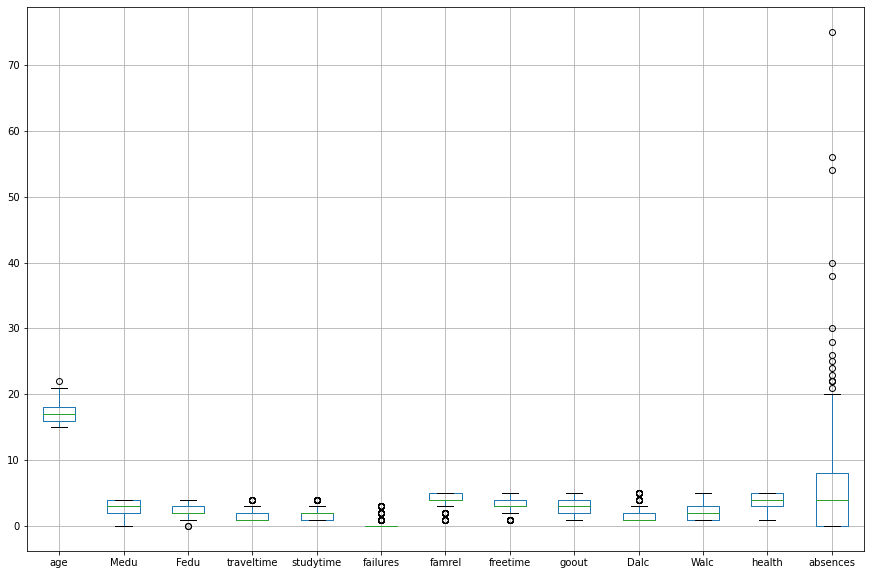

In [8]:
numerical_data.boxplot(figsize=(15,10))
plt.show()

In [9]:
#handling outliers

In [10]:
cols=['age', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime','Dalc', 'absences']

16.0
17.0
18.0
13.0
21.0


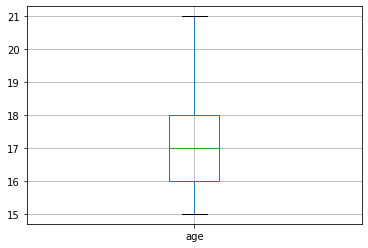

2.0
2.0
3.0
0.5
4.5


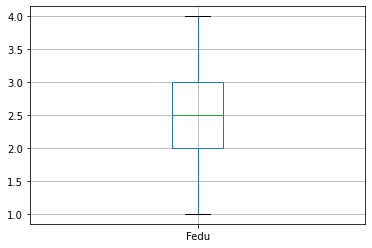

1.0
1.0
2.0
-0.5
3.5


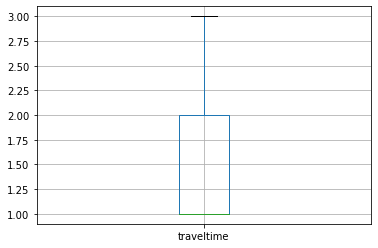

1.0
2.0
2.0
-0.5
3.5


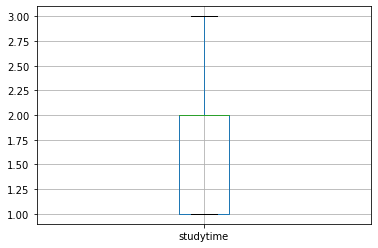

0.0
0.0
0.0
0.0
0.0


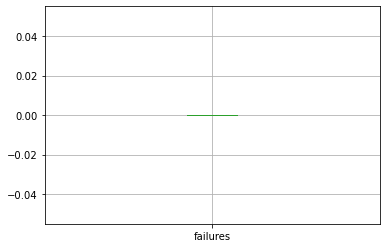

4.0
4.0
5.0
2.5
6.5


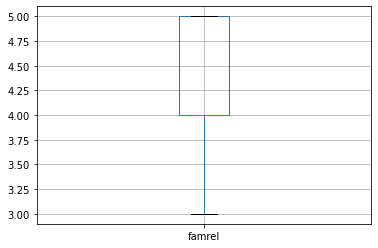

3.0
3.0
4.0
1.5
5.5


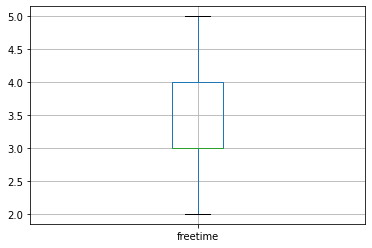

1.0
1.0
2.0
-0.5
3.5


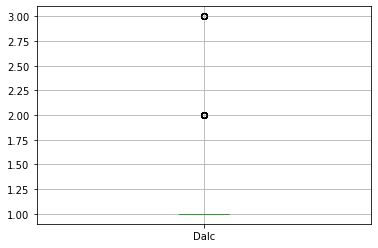

0.0
2.0
6.0
-9.0
15.0


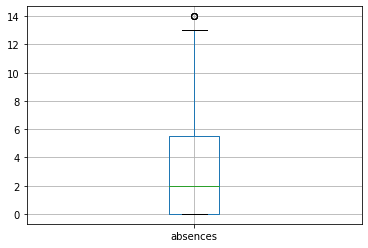

In [11]:
for x in cols:
 Q1=np.percentile(df[x],25, interpolation ='midpoint')
 print(Q1)
 Q2=np.percentile(df[x],50, interpolation ='midpoint')
 print(Q2)
 Q3=np.percentile(df[x],75, interpolation ='midpoint')
 print(Q3)
 IQR =Q3-Q1
 low_limit = Q1-1.5*IQR
 print(low_limit)
 upper_limit =Q3+1.5*IQR
 print(upper_limit)
 ind_1 =df[x]>upper_limit
 df.drop(df.loc[ind_1].index,inplace =True)
 ind_2 =df[x]<low_limit
 df.drop(df.loc[ind_2].index,inplace =True)
 df[[x]].boxplot()
 plt.show()

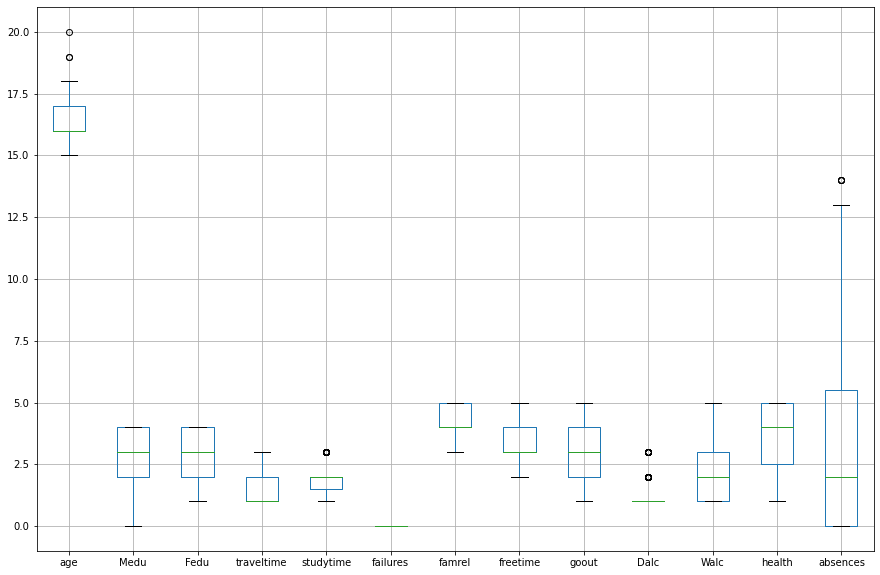

In [12]:
numerical_data=df.select_dtypes("int64")
numerical_data.boxplot(figsize=(15,10))
plt.show()


In [13]:

df.shape

(231, 31)

In [14]:
df.T

,0,1,3,4,5,6,8,9,10,11,...,374,377,380,381,382,385,386,388,393,394
school,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,...,MS,MS,MS,MS,MS,MS,MS,MS,MS,MS
sex,F,F,F,F,M,M,M,M,F,F,...,F,F,M,M,M,F,F,F,M,M
age,18,17,15,16,16,16,15,15,15,15,...,18,18,18,18,17,18,18,18,18,19
address,U,U,U,U,U,U,U,U,U,U,...,R,R,U,R,U,R,R,U,R,U
famsize,GT3,GT3,GT3,GT3,LE3,LE3,LE3,GT3,GT3,GT3,...,LE3,LE3,GT3,GT3,GT3,GT3,GT3,LE3,LE3,LE3
Pstatus,A,T,T,T,T,T,A,T,T,T,...,T,T,T,T,T,T,T,T,T,T
Medu,4,1,4,3,4,2,3,3,4,2,...,4,4,4,2,2,2,4,3,3,1
Fedu,4,1,2,3,3,2,2,4,4,1,...,4,4,4,1,3,2,4,1,2,1
Mjob,at_home,at_home,health,other,services,other,services,other,teacher,services,...,other,teacher,teacher,other,other,at_home,teacher,teacher,services,other
Fjob,teacher,other,services,other,other,other,other,other,health,other,...,other,services,teacher,other,services,other,at_home,services,other,at_home


In [15]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,no
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,yes
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,yes
5,GP,M,16,U,LE3,T,4,3,services,other,...,yes,no,5,4,2,1,2,5,10,yes


In [16]:
df.drop(['Mjob','Fjob','reason','famsize','guardian','sex','age','nursery'],axis=1,inplace=True)

In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["passed"] = le.fit_transform(df["passed"])


In [18]:
df.head()

,school,address,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,U,A,4,4,2,2,0,yes,no,...,no,no,4,3,4,1,1,3,6,0
1,GP,U,T,1,1,1,2,0,no,yes,...,yes,no,5,3,3,1,1,3,4,0
3,GP,U,T,4,2,1,3,0,no,yes,...,yes,yes,3,2,2,1,1,5,2,1
4,GP,U,T,3,3,1,2,0,no,yes,...,no,no,4,3,2,1,2,5,4,1
5,GP,U,T,4,3,1,2,0,no,yes,...,yes,no,5,4,2,1,2,5,10,1


In [19]:
df.T

,0,1,3,4,5,6,8,9,10,11,...,374,377,380,381,382,385,386,388,393,394
school,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,...,MS,MS,MS,MS,MS,MS,MS,MS,MS,MS
address,U,U,U,U,U,U,U,U,U,U,...,R,R,U,R,U,R,R,U,R,U
Pstatus,A,T,T,T,T,T,A,T,T,T,...,T,T,T,T,T,T,T,T,T,T
Medu,4,1,4,3,4,2,3,3,4,2,...,4,4,4,2,2,2,4,3,3,1
Fedu,4,1,2,3,3,2,2,4,4,1,...,4,4,4,1,3,2,4,1,2,1
traveltime,2,1,1,1,1,1,1,1,1,3,...,2,1,1,2,2,2,3,1,3,1
studytime,2,2,3,2,2,2,2,2,2,3,...,3,2,2,1,2,3,1,2,1,1
failures,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
schoolsup,yes,no,no,no,no,no,no,no,no,no,...,no,no,no,no,no,no,no,no,no,no
famsup,no,yes,yes,yes,yes,no,yes,yes,yes,yes,...,no,no,no,no,no,no,yes,yes,no,no


In [20]:
for x in ['schoolsup','famsup','paid','activities','higher','internet','romantic']:
    le = LabelEncoder()
    df[x] = le.fit_transform(df[x])

In [21]:
df.T

,0,1,3,4,5,6,8,9,10,11,...,374,377,380,381,382,385,386,388,393,394
school,GP,GP,GP,GP,GP,GP,GP,GP,GP,GP,...,MS,MS,MS,MS,MS,MS,MS,MS,MS,MS
address,U,U,U,U,U,U,U,U,U,U,...,R,R,U,R,U,R,R,U,R,U
Pstatus,A,T,T,T,T,T,A,T,T,T,...,T,T,T,T,T,T,T,T,T,T
Medu,4,1,4,3,4,2,3,3,4,2,...,4,4,4,2,2,2,4,3,3,1
Fedu,4,1,2,3,3,2,2,4,4,1,...,4,4,4,1,3,2,4,1,2,1
traveltime,2,1,1,1,1,1,1,1,1,3,...,2,1,1,2,2,2,3,1,3,1
studytime,2,2,3,2,2,2,2,2,2,3,...,3,2,2,1,2,3,1,2,1,1
failures,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
schoolsup,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
famsup,0,1,1,1,1,0,1,1,1,1,...,0,0,0,0,0,0,1,1,0,0


In [22]:
df=pd.get_dummies(df,drop_first=True)

In [23]:
df.T

,0,1,3,4,5,6,8,9,10,11,...,374,377,380,381,382,385,386,388,393,394
Medu,4,1,4,3,4,2,3,3,4,2,...,4,4,4,2,2,2,4,3,3,1
Fedu,4,1,2,3,3,2,2,4,4,1,...,4,4,4,1,3,2,4,1,2,1
traveltime,2,1,1,1,1,1,1,1,1,3,...,2,1,1,2,2,2,3,1,3,1
studytime,2,2,3,2,2,2,2,2,2,3,...,3,2,2,1,2,3,1,2,1,1
failures,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
schoolsup,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
famsup,0,1,1,1,1,0,1,1,1,1,...,0,0,0,0,0,0,1,1,0,0
paid,0,0,1,1,1,0,1,1,1,0,...,0,1,1,0,0,1,1,1,0,0
activities,0,0,1,0,1,0,0,1,0,1,...,0,1,1,1,1,0,1,0,0,0
higher,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [27]:
x=df.drop(['passed'],axis=1)
y=df['passed']

In [29]:
import warnings
warnings.filterwarnings("ignore")

# Modelling

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,random_state=42,test_size=0.2)


# Logistic regression

In [31]:
from sklearn.linear_model import LogisticRegression
log_reg= LogisticRegression()
log_model= log_reg.fit(x_train,y_train)
y_pred= log_model.predict(x_test)

In [32]:
from sklearn.metrics import f1_score,accuracy_score, precision_score, recall_score,confusion_matrix
f1_score(y_test,y_pred)

0.8205128205128205

In [33]:
confusion_matrix(y_test,y_pred)

array([[ 1, 13],
       [ 1, 32]], dtype=int64)

# Random forest

In [34]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
random_model=rfc.fit(x_train,y_train)
y_predict=random_model.predict(x_test)
from sklearn.metrics import f1_score,confusion_matrix
f1_score(y_test,y_predict)

0.7894736842105263

In [35]:
confusion_matrix(y_test,y_pred)

array([[ 1, 13],
       [ 1, 32]], dtype=int64)

# K-nearest

In [36]:
from sklearn.neighbors import KNeighborsClassifier
acc_values=[]
neighbors= np.arange(3,15)
for k in neighbors:
    classifier= KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    knn_model= classifier.fit(x_train,y_train)
    y_predict= knn_model.predict(x_test)
    acc= accuracy_score(y_test,y_predict)
    acc_values.append(acc)

In [37]:
acc_values

[0.6595744680851063,
 0.5957446808510638,
 0.6595744680851063,
 0.6382978723404256,
 0.6595744680851063,
 0.6382978723404256,
 0.723404255319149,
 0.7021276595744681,
 0.7021276595744681,
 0.6808510638297872,
 0.7021276595744681,
 0.7021276595744681]

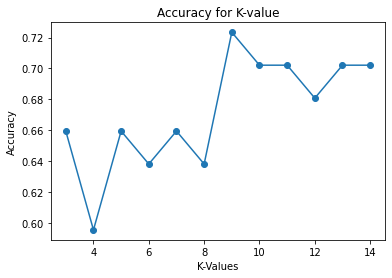

In [38]:
plt.plot(neighbors,acc_values,'o-')
plt.xlabel('K-Values')
plt.ylabel('Accuracy')
plt.title('Accuracy for K-value')
plt.show()

In [39]:
classifier= KNeighborsClassifier(n_neighbors=9,metric='minkowski')
knn_model= classifier.fit(x_train,y_train)
y_predict= knn_model.predict(x_test)

In [40]:
f1_score(y_test,y_predict)

0.8311688311688312

In [41]:
confusion_matrix(y_test,y_predict)

array([[ 2, 12],
       [ 1, 32]], dtype=int64)

# Decision tree

In [42]:
 from sklearn.tree import DecisionTreeClassifier
dt=  DecisionTreeClassifier()
dt_model=dt.fit(x_train,y_train)
y_predict =dt_model.predict(x_test)
f1_score(y_test,y_predict)

0.6461538461538462

In [43]:
confusion_matrix(y_test,y_predict)

array([[ 3, 11],
       [12, 21]], dtype=int64)

from f1 score we can deduce that logistic regression and k-nearest are the best models